In [21]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
digit = keras.datasets.mnist.load_data()
digit # is a tuple containing ((x_train, y_train), (x_test, y_test))

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [23]:
(X_train, y_train), (X_test, y_test) = digit

In [24]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [25]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [27]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

<Figure size 100x100 with 0 Axes>

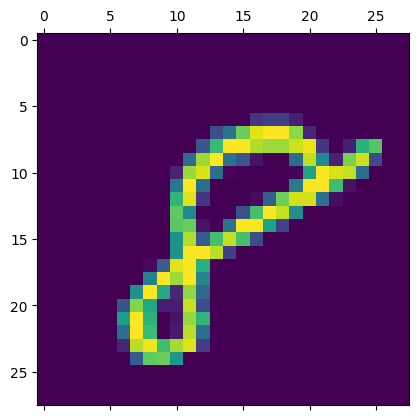

In [34]:
plt.figure(figsize=(1, 1))  # width, height in inches.
plt.matshow(X_train[59999])

### Data Manipulation

In [9]:
X_train_flattened = X_train.reshape(len(X_train),-1)
X_train_flattened.shape

(60000, 784)

In [10]:
X_test_flattened = X_test.reshape(len(X_test),-1)
X_test_flattened.shape

(10000, 784)

In [11]:
# Scale
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

X_train = X_train / 255
X_test = X_test / 255

### Build Model

In [12]:
model = keras.Sequential([
    keras.layers.Input(shape=(784, )),
    keras.layers.Dense(100, activation='relu'), # hidden_layer_1 = 100
    keras.layers.Dense(10, activation='sigmoid') # output_layer = 10
])

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8710 - loss: 0.4680
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9636 - loss: 0.1295


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1109


[0.0988159030675888, 0.9695000052452087]

In [14]:
proba = model.predict(X_test_flattened)  # predict in keras resembles predict_proba in sklearn
proba.shape, np.round(proba[:3], decimals=2)
# sigmoid is suitable for binary classification, not for this task of classifying 10 numbers

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((10000, 10),
 array([[0.2 , 0.  , 0.41, 0.9 , 0.  , 0.07, 0.  , 1.  , 0.11, 0.75],
        [0.05, 0.42, 1.  , 0.79, 0.  , 0.27, 0.3 , 0.  , 0.77, 0.  ],
        [0.  , 0.99, 0.39, 0.11, 0.05, 0.09, 0.1 , 0.43, 0.24, 0.02]],
       dtype=float32))

In [15]:
yp_test = np.array([np.argmax(i) for i in proba])  # returns the indices of the maximum values along an axis
yp_test.shape, yp_test

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

<Axes: >

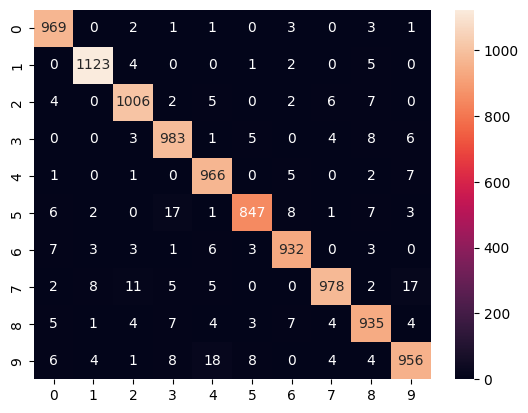

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=yp_test)

sns.heatmap(cm,annot=True,fmt='d')
# annot=True enables annotations on the heatmap.
# fmt=".2f" formats the annotations to two decimal places.

### No Need to Flatten first & Using Softmax Function

In [17]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'), # input_layer = 784, hidden_layer_1 = 100
    keras.layers.Dense(10, activation='softmax') # output_layer = 10
])

model2.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model2.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8704 - loss: 0.4582
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9604 - loss: 0.1319


In [18]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1240


[0.1081741601228714, 0.9664999842643738]

In [19]:
proba2 = model2.predict(X_test)
proba2.shape, np.round(proba2[:3], decimals=2)
# softmax function returns the pseudo probability of each number

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((10000, 10),
 array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
       dtype=float32))

In [20]:
yp2_test = np.array([np.argmax(i) for i in proba2])  # returns the indices of the maximum values along an axis
yp2_test.shape, yp2_test

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=int64))